ERROR: Could not find a version that satisfies the requirement tensorflow==2.9.2 (from versions: 2.16.0rc0, 2.16.1, 2.16.2, 2.17.0rc0, 2.17.0rc1, 2.17.0, 2.17.1, 2.18.0rc0, 2.18.0rc1, 2.18.0rc2, 2.18.0, 2.18.1, 2.19.0rc0, 2.19.0, 2.19.1, 2.20.0rc0, 2.20.0)
ERROR: No matching distribution found for tensorflow==2.9.2
Upload FOTO UTAMA:


Saving Screenshot 2025-12-01 190754.png to Screenshot 2025-12-01 190754.png
Upload GAMBAR STYLE:


Saving batik-simbut.webp to batik-simbut.webp


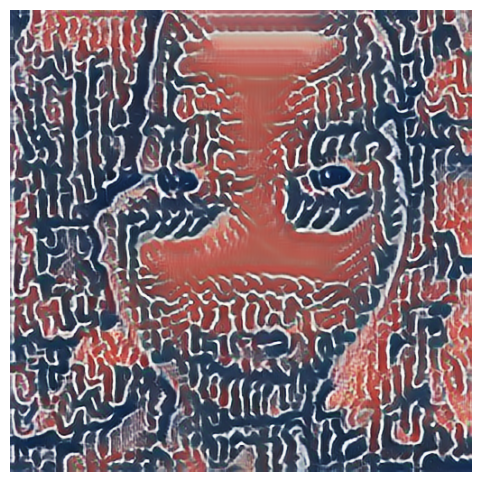

Hasil disimpan sebagai hasil_fast_style.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
# ============================================================
# FAST STYLE TRANSFER (Ultrafast — 1–2 detik)
# ============================================================

!pip install tensorflow==2.9.2 tensorflow_hub==0.12.0

import tensorflow_hub as hub
import tensorflow as tf
import numpy as np
import PIL.Image as Image
from google.colab import files
import io

# ============================================================
# 1. Upload content (foto) dan style (motif)
# ============================================================
print("Upload FOTO UTAMA:")
uploaded_content = files.upload()
content_path = list(uploaded_content.keys())[0]

print("Upload GAMBAR STYLE:")
uploaded_style = files.upload()
style_path = list(uploaded_style.keys())[0]


# ============================================================
# 2. Fungsi load image & resize
# ============================================================
def load_image(img_path, max_dim=512):
    img = Image.open(img_path).convert('RGB')
    img = np.array(img)
    img = tf.image.resize(img, (max_dim, max_dim))
    img = tf.cast(img, tf.float32) / 255.0
    return img[tf.newaxis, :]


content_image = load_image(content_path)
style_image = load_image(style_path)

# ============================================================
# 3. Load pretrained FAST STYLE TRANSFER model
# ============================================================
model = hub.load("https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2")

# ============================================================
# 4. Apply style transfer (super cepat)
# ============================================================
stylized_image = model(content_image, style_image)[0]

# ============================================================
# 5. Save & Show
# ============================================================
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 6))
plt.imshow(tf.squeeze(stylized_image))
plt.axis('off')
plt.show()

# Simpan hasil
output = tf.squeeze(stylized_image)*255
output = tf.cast(output, tf.uint8).numpy()
out_img = Image.fromarray(output)
out_img.save("hasil_fast_style.png")

print("Hasil disimpan sebagai hasil_fast_style.png")
files.download("hasil_fast_style.png")


In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# -----------------------------------------------------
# Download the model if it's not present
# -----------------------------------------------------
model_path = "mosaic.t7"
import os

if not os.path.exists(model_path):
    print(f"Downloading {model_path}...")
    # Changed the URL to the direct raw content URL for better reliability
    !wget https://raw.githubusercontent.com/jcjohnson/fast-neural-style/master/models/{model_path}
    print("Download complete.")

# -----------------------------------------------------
# 1. LOAD FAST STYLE TRANSFER MODEL
# -----------------------------------------------------
# Model cepat (Mosaic, Candy, Udnie, dll.)
# Pilih salah satu model .t7 (pretrained)
net = cv2.dnn.readNetFromTorch(model_path)

# -----------------------------------------------------
# 2. LOAD CONTENT & STYLE IMAGE
# -----------------------------------------------------
# Assuming 'content.jpg' and 'style.jpg' are already uploaded or created
# If not, you might need to upload them or provide paths to existing images.
# For now, let's use placeholder content/style if they don't exist from previous cells
import io
from google.colab import files

if not os.path.exists("content.jpg"):
    print("Please upload a content image (e.g., content.jpg).")
    uploaded_content_img = files.upload()
    content_filename = list(uploaded_content_img.keys())[0]
    os.rename(content_filename, "content.jpg")
    print(f"Content image '{content_filename}' renamed to 'content.jpg'.")

if not os.path.exists("style.jpg"):
    print("Please upload a style image (e.g., style.jpg).")
    uploaded_style_img = files.upload()
    style_filename = list(uploaded_style_img.keys())[0]
    os.rename(style_filename, "style.jpg")
    print(f"Style image '{style_filename}' renamed to 'style.jpg'.")

content = cv2.imread("content.jpg")
style = cv2.imread("style.jpg")

# Check if images were loaded successfully
if content is None:
    raise FileNotFoundError("Content image not found at 'content.jpg'")
if style is None:
    raise FileNotFoundError("Style image not found at 'style.jpg'")

# resize biar sama rasio
h, w = content.shape[:2]
# Ensure style image is also properly loaded before resizing
style = cv2.resize(style, (w, h))

# -----------------------------------------------------
# 3. GENERATE STYLE TRANSFER (FAST)
# -----------------------------------------------------
blob = cv2.dnn.blobFromImage(content, 1.0, (w, h),
                             (103.939, 116.779, 123.68), swapRB=False, crop=False)

net.setInput(blob)
output = net.forward()

# kembalikan BGR normal
output = output.reshape((3, h, w))
output[0] += 103.939
output[1] += 116.779
output[2] += 123.68
output = output.transpose(1, 2, 0)
output = np.clip(output, 0, 255).astype('uint8')

# -----------------------------------------------------
# 4. PRINT OUT: CONTENT + STYLE + RESULT
# -----------------------------------------------------
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(content, cv2.COLOR_BGR2RGB))
plt.title("Content Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(style, cv2.COLOR_BGR2RGB))
plt.title("Style Image")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
plt.title("Result")
plt.axis("off")

plt.tight_layout()
plt.show()